# Data Analysis Churn

**==========================================================================================================**

## Data Tasks

### 1) Understand the shape of the data (Histograms, box plots, etc.)

### 2) Data Cleaning 

### 3) Data Exploration

### 4) Feature Engineering 

### 5) Data Preprocessing for Model

### 6) Basic Model Building 

### 7) Model Tuning 

### 8) Ensemble Model Building 

### 9) Results 


**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
#from numpy import count_nonzero, median, mean
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
desc = pd.read_csv("data_descriptions.csv")
desc

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly ba...
2,TotalCharges,Feature,float,The total charges incurred by the user over th...
3,SubscriptionType,Feature,object,The type of subscription chosen by the user (B...
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paper...
6,ContentType,Feature,string,The type of content preferred by the user (Mov...
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the s...
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV,..."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching c...


**==========================================================================================================**

## Data Quick Glance

In [3]:
df = pd.read_csv("fulldata.csv")

In [4]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.06,221.10,Premium,Mailed check,No,Both,No,Mobile,36.76,63.53,10,Sci-Fi,2.18,4,Male,3,No,No,CB6SXPNVZA,0.00
1,57,5.18,294.99,Basic,Credit card,Yes,Movies,No,Tablet,32.45,25.73,18,Action,3.48,8,Male,23,No,Yes,S7R2G87O09,0.00
2,73,12.11,883.79,Basic,Mailed check,Yes,Movies,No,Computer,7.40,57.36,23,Fantasy,4.24,6,Male,1,Yes,Yes,EASDC20BDT,0.00
3,32,7.26,232.44,Basic,Electronic check,No,TV Shows,No,Tablet,27.96,131.54,30,Drama,4.28,2,Male,24,Yes,Yes,NPF69NT69N,0.00
4,57,16.95,966.33,Premium,Electronic check,Yes,TV Shows,No,TV,20.08,45.36,20,Comedy,3.62,4,Female,0,No,No,4LGYPK7VOL,0.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348267 entries, 0 to 348266
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                348267 non-null  int64  
 1   MonthlyCharges            348267 non-null  float64
 2   TotalCharges              348267 non-null  float64
 3   SubscriptionType          348267 non-null  object 
 4   PaymentMethod             348267 non-null  object 
 5   PaperlessBilling          348267 non-null  object 
 6   ContentType               348267 non-null  object 
 7   MultiDeviceAccess         348267 non-null  object 
 8   DeviceRegistered          348267 non-null  object 
 9   ViewingHoursPerWeek       348267 non-null  float64
 10  AverageViewingDuration    348267 non-null  float64
 11  ContentDownloadsPerMonth  348267 non-null  int64  
 12  GenrePreference           348267 non-null  object 
 13  UserRating                348267 non-null  f

In [6]:
df.dtypes.value_counts(dropna=False)

object     11
float64     6
int64       4
dtype: int64

In [7]:
# Descriptive Statistical Analysis
df.describe(include="all")

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
count,348267.00,348267.00,348267.00,348267,348267,348267,348267,348267,348267,348267.00,348267.00,348267.00,348267,348267.00,348267.00,348267,348267.00,348267,348267,348267,243787.00
unique,NaN,NaN,NaN,3,4,2,3,2,4,NaN,NaN,NaN,5,NaN,NaN,2,NaN,2,2,348267,NaN
top,NaN,NaN,NaN,Standard,Electronic check,No,Both,Yes,Tablet,NaN,NaN,NaN,Comedy,NaN,NaN,Female,NaN,No,Yes,CB6SXPNVZA,NaN
freq,NaN,NaN,NaN,116753,87440,174544,116824,174139,87480,NaN,NaN,NaN,70004,NaN,NaN,174256,NaN,174222,174439,1,NaN
mean,60.08,12.49,749.97,NaN,NaN,NaN,NaN,NaN,NaN,20.50,92.38,24.49,NaN,3.00,4.51,NaN,12.03,NaN,NaN,NaN,0.18
std,34.29,4.33,522.39,NaN,NaN,NaN,NaN,NaN,NaN,11.24,50.54,14.43,NaN,1.16,2.87,NaN,7.20,NaN,NaN,NaN,0.39
min,1.00,4.99,4.99,NaN,NaN,NaN,NaN,NaN,NaN,1.00,5.00,0.00,NaN,1.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00
25%,30.00,8.73,329.10,NaN,NaN,NaN,NaN,NaN,NaN,10.76,48.44,12.00,NaN,2.00,2.00,NaN,6.00,NaN,NaN,NaN,0.00
50%,60.00,12.48,649.72,NaN,NaN,NaN,NaN,NaN,NaN,20.51,92.34,25.00,NaN,3.00,5.00,NaN,12.00,NaN,NaN,NaN,0.00
75%,90.00,16.23,1086.76,NaN,NaN,NaN,NaN,NaN,NaN,30.21,136.12,37.00,NaN,4.00,7.00,NaN,18.00,NaN,NaN,NaN,0.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,348267.00,348267.00,348267.00,348267.00,348267.00,348267.00,348267.00,348267.00,348267.00,243787.00
mean,60.08,12.49,749.97,20.50,92.38,24.49,3.00,4.51,12.03,0.18
std,34.29,4.33,522.39,11.24,50.54,14.43,1.16,2.87,7.20,0.39
min,1.00,4.99,4.99,1.00,5.00,0.00,1.00,0.00,0.00,0.00
25%,30.00,8.73,329.10,10.76,48.44,12.00,2.00,2.00,6.00,0.00
50%,60.00,12.48,649.72,20.51,92.34,25.00,3.00,5.00,12.00,0.00
75%,90.00,16.23,1086.76,30.21,136.12,37.00,4.00,7.00,18.00,0.00
max,119.00,19.99,2378.72,40.00,180.00,49.00,5.00,9.00,24.00,1.00


In [9]:
# Descriptive Statistical Analysis
df.describe(include="object")

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,CustomerID
count,348267,348267,348267,348267,348267,348267,348267,348267,348267,348267,348267
unique,3,4,2,3,2,4,5,2,2,2,348267
top,Standard,Electronic check,No,Both,Yes,Tablet,Comedy,Female,No,Yes,CB6SXPNVZA
freq,116753,87440,174544,116824,174139,87480,70004,174256,174222,174439,1


In [10]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID', 'Churn'], dtype='object')

In [11]:
df.shape

(348267, 21)

In [12]:
df.isnull().sum()

AccountAge                       0
MonthlyCharges                   0
TotalCharges                     0
SubscriptionType                 0
PaymentMethod                    0
PaperlessBilling                 0
ContentType                      0
MultiDeviceAccess                0
DeviceRegistered                 0
ViewingHoursPerWeek              0
AverageViewingDuration           0
ContentDownloadsPerMonth         0
GenrePreference                  0
UserRating                       0
SupportTicketsPerMonth           0
Gender                           0
WatchlistSize                    0
ParentalControl                  0
SubtitlesEnabled                 0
CustomerID                       0
Churn                       104480
dtype: int64

In [13]:
df.fillna(999.0, inplace=True)

In [14]:
df.duplicated().sum()

0

## Sample a smaller dataset

In [15]:
df = df.sample(frac=0.1)

In [16]:
df

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
104792,54,17.99,971.40,Premium,Credit card,Yes,TV Shows,Yes,Tablet,1.27,66.99,16,Fantasy,2.99,9,Female,8,Yes,No,Z9SF44FGVL,1.00
335653,102,10.80,1101.51,Basic,Bank transfer,Yes,Both,Yes,Mobile,34.65,34.84,49,Sci-Fi,1.67,5,Male,14,No,No,1K5TQJ2533,999.00
194264,115,17.95,2064.00,Standard,Mailed check,Yes,Both,Yes,Tablet,33.95,143.36,6,Action,1.77,7,Female,1,Yes,No,OLRW16I196,0.00
193336,39,12.35,481.59,Premium,Mailed check,Yes,Movies,Yes,TV,8.07,56.79,49,Action,2.77,7,Male,18,Yes,No,DRK7LTXJ38,0.00
320524,108,8.11,875.75,Standard,Electronic check,No,Movies,Yes,Tablet,11.58,108.21,30,Comedy,3.96,5,Female,13,Yes,No,4VFIAH3Z35,999.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34631,7,19.26,134.84,Premium,Electronic check,No,TV Shows,No,TV,32.03,82.09,34,Fantasy,3.27,8,Female,9,Yes,Yes,L0Y10KBA85,0.00
90582,7,16.87,118.11,Basic,Electronic check,Yes,Both,No,Computer,2.04,12.98,5,Action,4.05,2,Male,2,No,No,V967ZIYE5U,1.00
177504,75,7.02,526.16,Standard,Bank transfer,No,Both,Yes,Tablet,27.89,96.01,47,Sci-Fi,1.49,3,Female,19,Yes,No,21ZVGVEU6H,0.00
27031,23,13.04,299.92,Premium,Bank transfer,No,Both,Yes,TV,8.93,161.20,11,Action,4.57,4,Male,18,No,Yes,C8EGCLPFUF,0.00


In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df.shape

(34827, 21)

In [19]:
df.Churn.value_counts()

0.00      19973
999.00    10491
1.00       4363
Name: Churn, dtype: int64

**==========================================================================================================**

## Split into categorical and numeric dataframes

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34827 entries, 0 to 34826
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AccountAge                34827 non-null  int64  
 1   MonthlyCharges            34827 non-null  float64
 2   TotalCharges              34827 non-null  float64
 3   SubscriptionType          34827 non-null  object 
 4   PaymentMethod             34827 non-null  object 
 5   PaperlessBilling          34827 non-null  object 
 6   ContentType               34827 non-null  object 
 7   MultiDeviceAccess         34827 non-null  object 
 8   DeviceRegistered          34827 non-null  object 
 9   ViewingHoursPerWeek       34827 non-null  float64
 10  AverageViewingDuration    34827 non-null  float64
 11  ContentDownloadsPerMonth  34827 non-null  int64  
 12  GenrePreference           34827 non-null  object 
 13  UserRating                34827 non-null  float64
 14  Suppor

In [21]:
df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,54,17.99,971.40,Premium,Credit card,Yes,TV Shows,Yes,Tablet,1.27,66.99,16,Fantasy,2.99,9,Female,8,Yes,No,Z9SF44FGVL,1.00
1,102,10.80,1101.51,Basic,Bank transfer,Yes,Both,Yes,Mobile,34.65,34.84,49,Sci-Fi,1.67,5,Male,14,No,No,1K5TQJ2533,999.00
2,115,17.95,2064.00,Standard,Mailed check,Yes,Both,Yes,Tablet,33.95,143.36,6,Action,1.77,7,Female,1,Yes,No,OLRW16I196,0.00
3,39,12.35,481.59,Premium,Mailed check,Yes,Movies,Yes,TV,8.07,56.79,49,Action,2.77,7,Male,18,Yes,No,DRK7LTXJ38,0.00
4,108,8.11,875.75,Standard,Electronic check,No,Movies,Yes,Tablet,11.58,108.21,30,Comedy,3.96,5,Female,13,Yes,No,4VFIAH3Z35,999.00


In [22]:
df.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating', 'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID', 'Churn'], dtype='object')

In [23]:
df_num = df.select_dtypes(include=["int64","float64"])

In [24]:
df_num.head()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
0,54,17.99,971.40,1.27,66.99,16,2.99,9,8,1.00
1,102,10.80,1101.51,34.65,34.84,49,1.67,5,14,999.00
2,115,17.95,2064.00,33.95,143.36,6,1.77,7,1,0.00
3,39,12.35,481.59,8.07,56.79,49,2.77,7,18,0.00
4,108,8.11,875.75,11.58,108.21,30,3.96,5,13,999.00


In [25]:
df_num.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize', 'Churn'], dtype='object')

In [26]:
pd.pivot_table(data=df_num, index="Churn", values=["AccountAge","MonthlyCharges",'TotalCharges'], aggfunc="mean")

,AccountAge,MonthlyCharges,TotalCharges
Churn,,,
0.00,63.29,12.22,777.78
1.00,45.16,13.41,605.61
999.00,60.38,12.50,752.53


In [27]:
pd.pivot_table(data=df_num, index="Churn", values=['ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth'], aggfunc="mean")

,AverageViewingDuration,ContentDownloadsPerMonth,ViewingHoursPerWeek
Churn,,,
0.00,95.95,25.14,21.31
1.00,76.72,20.55,17.61
999.00,92.39,24.56,20.56


In [28]:
pd.pivot_table(data=df_num, index="Churn", values=['UserRating', 'SupportTicketsPerMonth', 'WatchlistSize'], aggfunc="mean")

,SupportTicketsPerMonth,UserRating,WatchlistSize
Churn,,,
0.00,4.39,2.99,11.96
1.00,5.07,3.06,12.28
999.00,4.53,3.00,12.12


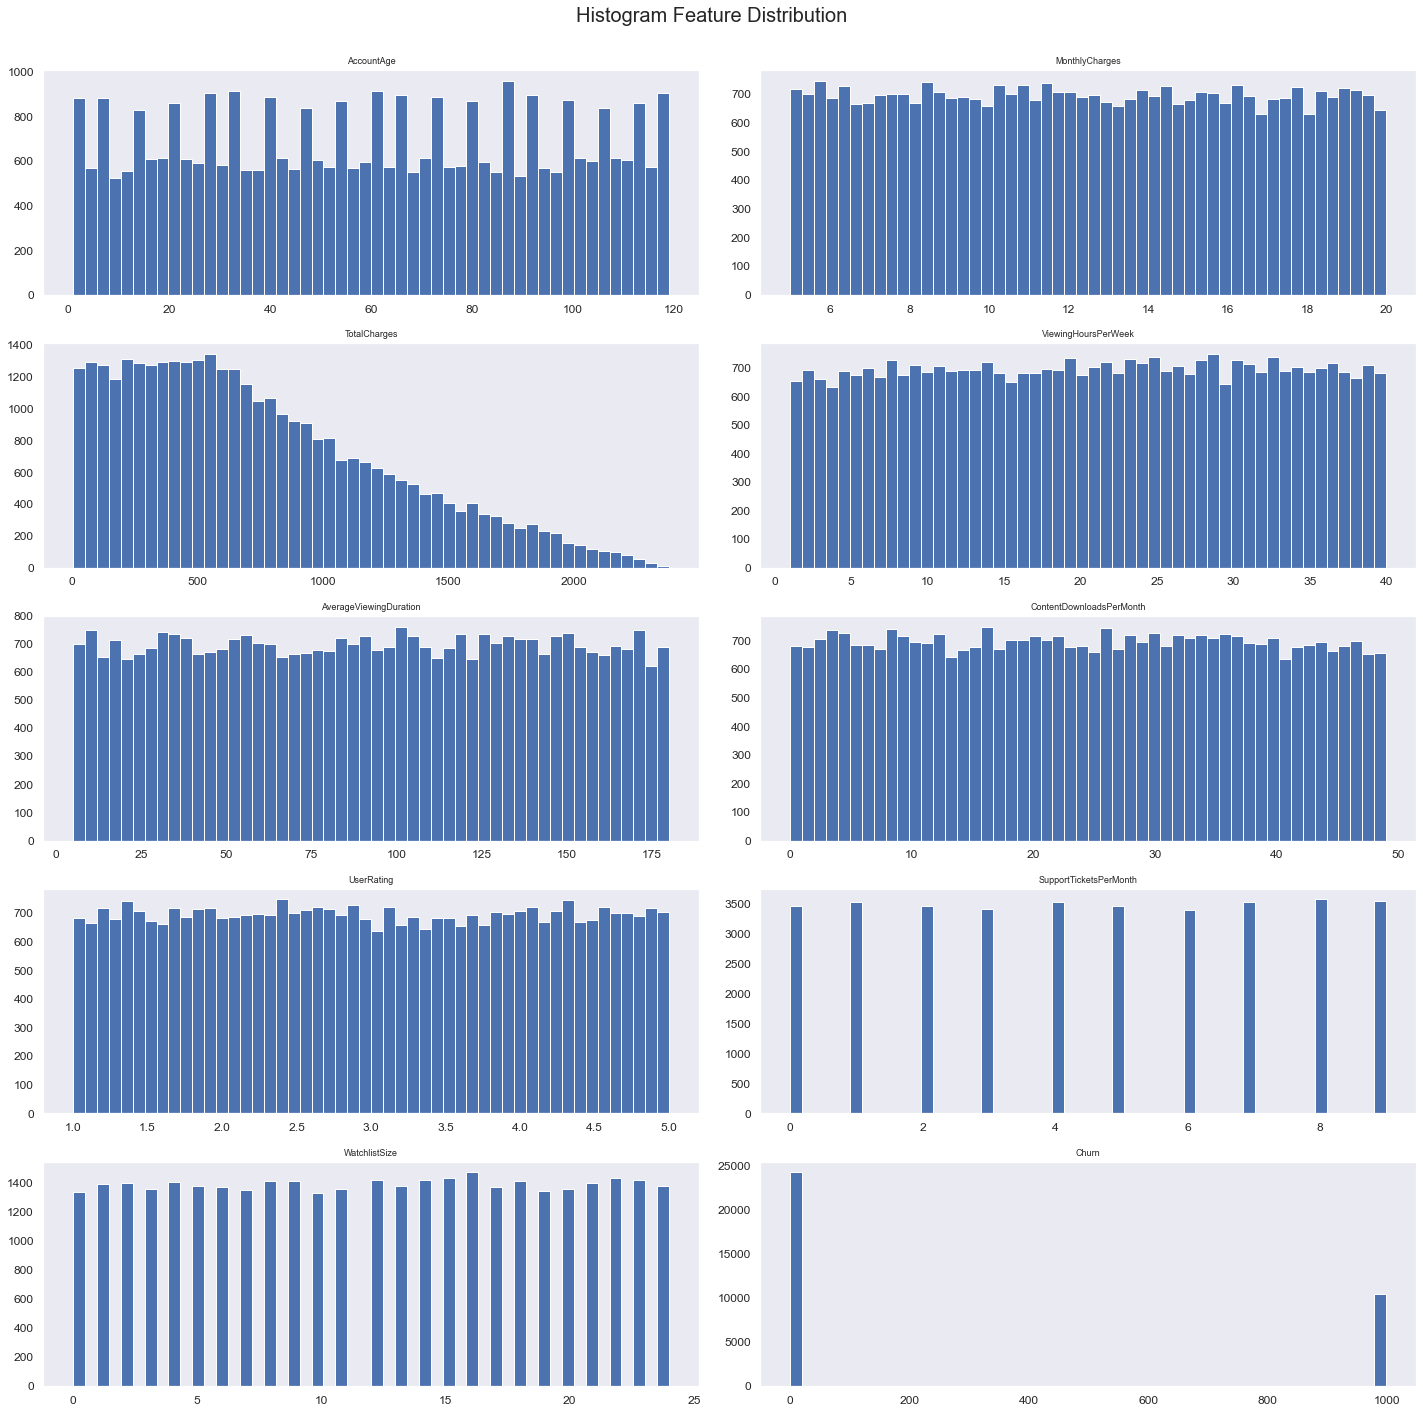

In [29]:
df_num.hist(bins=50, figsize=(20,80), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.0, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

In [30]:
df_num.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating', 'SupportTicketsPerMonth', 'WatchlistSize', 'Churn'], dtype='object')

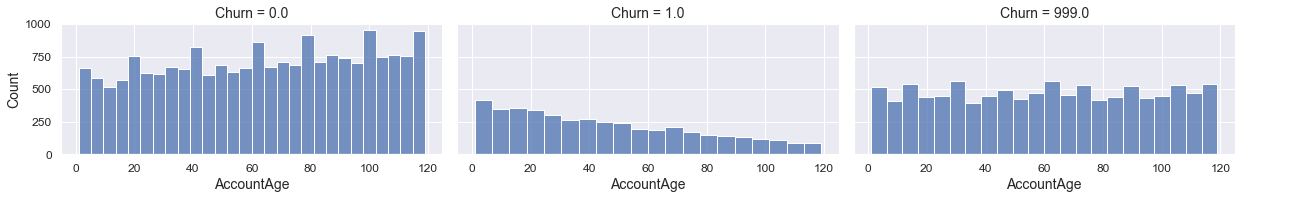

In [31]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'AccountAge')
g.add_legend()
plt.show()

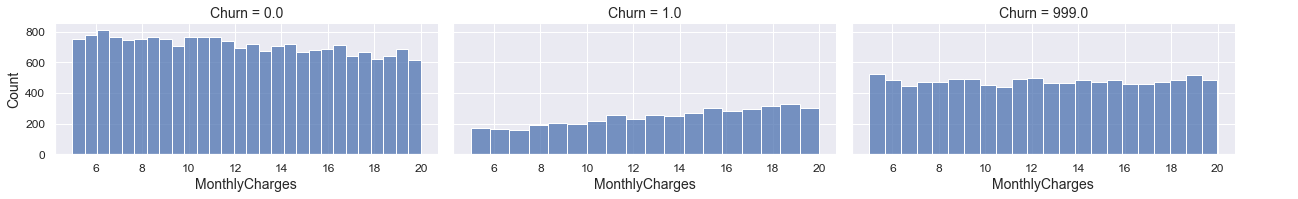

In [32]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'MonthlyCharges')
g.add_legend()
plt.show()

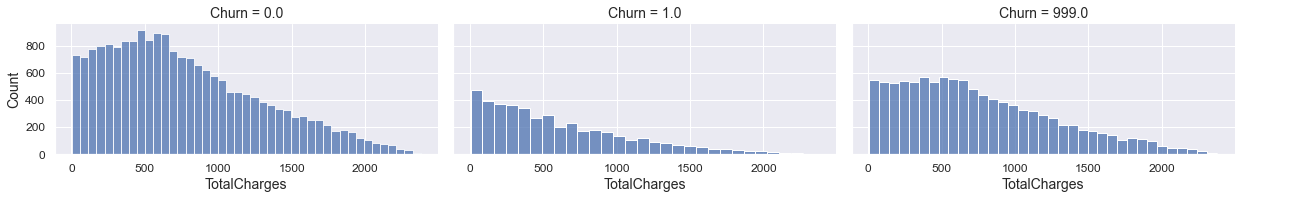

In [33]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'TotalCharges')
g.add_legend()
plt.show()

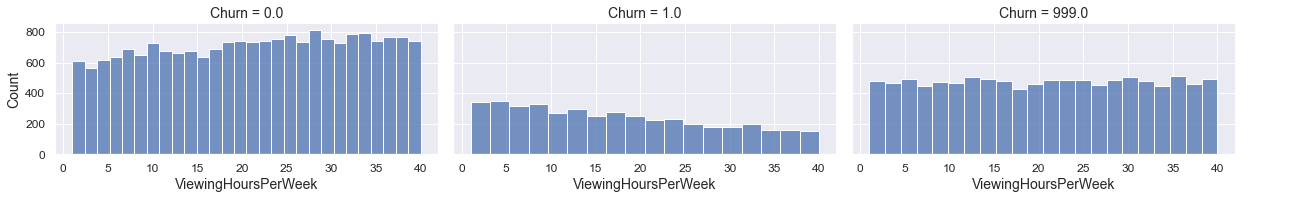

In [34]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'ViewingHoursPerWeek')
g.add_legend()
plt.show()

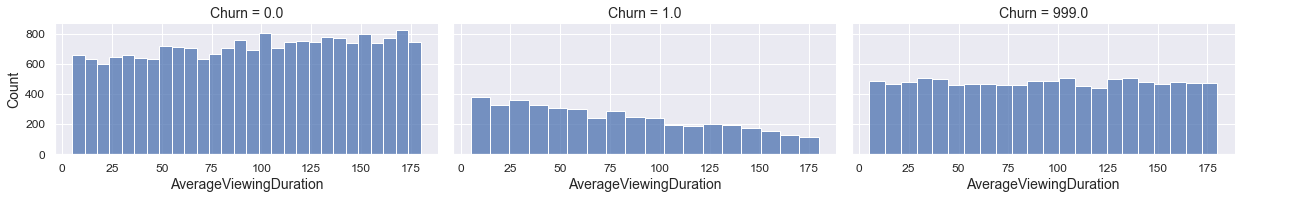

In [35]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'AverageViewingDuration')
g.add_legend()
plt.show()

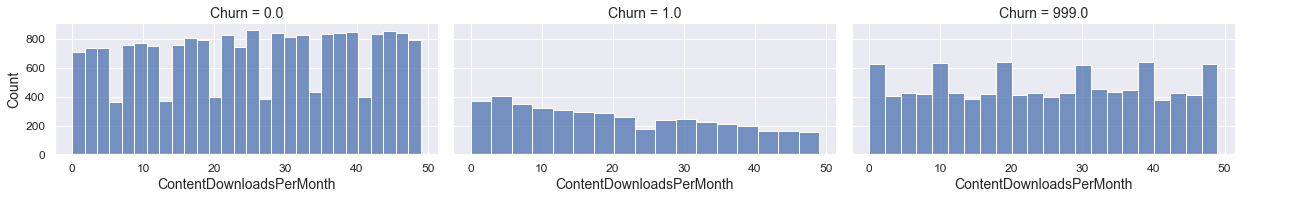

In [36]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'ContentDownloadsPerMonth')
g.add_legend()
plt.show()

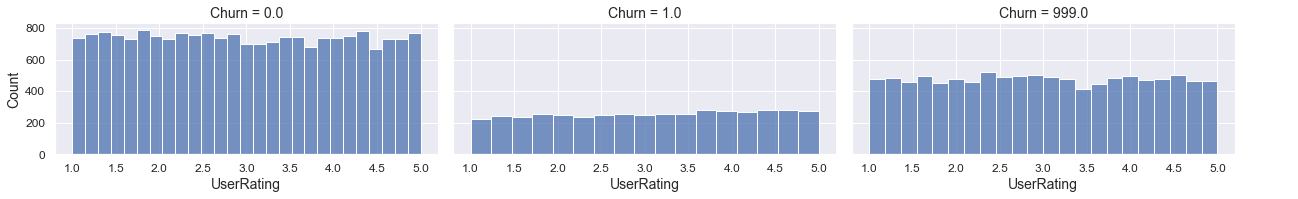

In [37]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'UserRating')
g.add_legend()
plt.show()

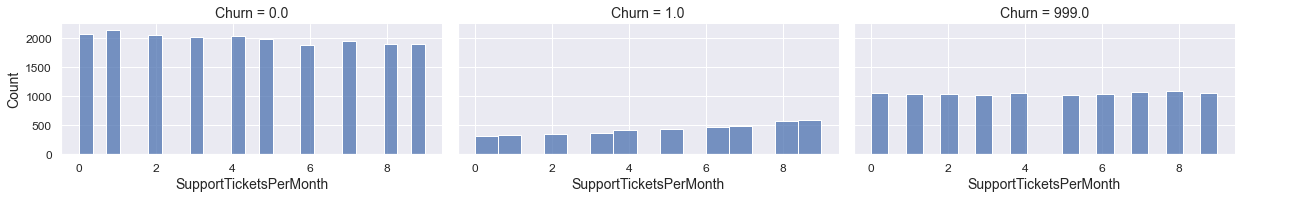

In [38]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'SupportTicketsPerMonth')
g.add_legend()
plt.show()

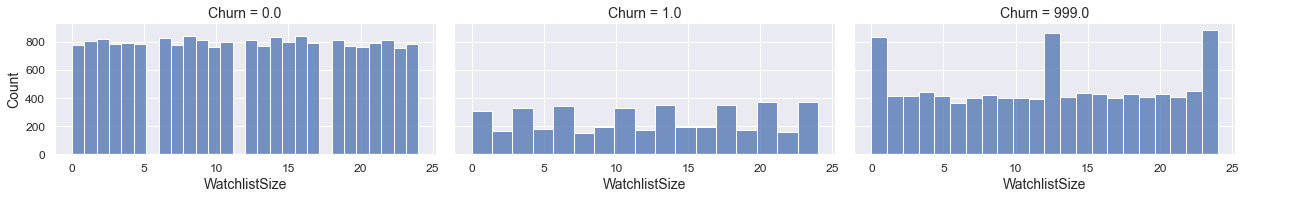

In [39]:
g = sns.FacetGrid(data=df_num, col="Churn", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, 'WatchlistSize')
g.add_legend()
plt.show()

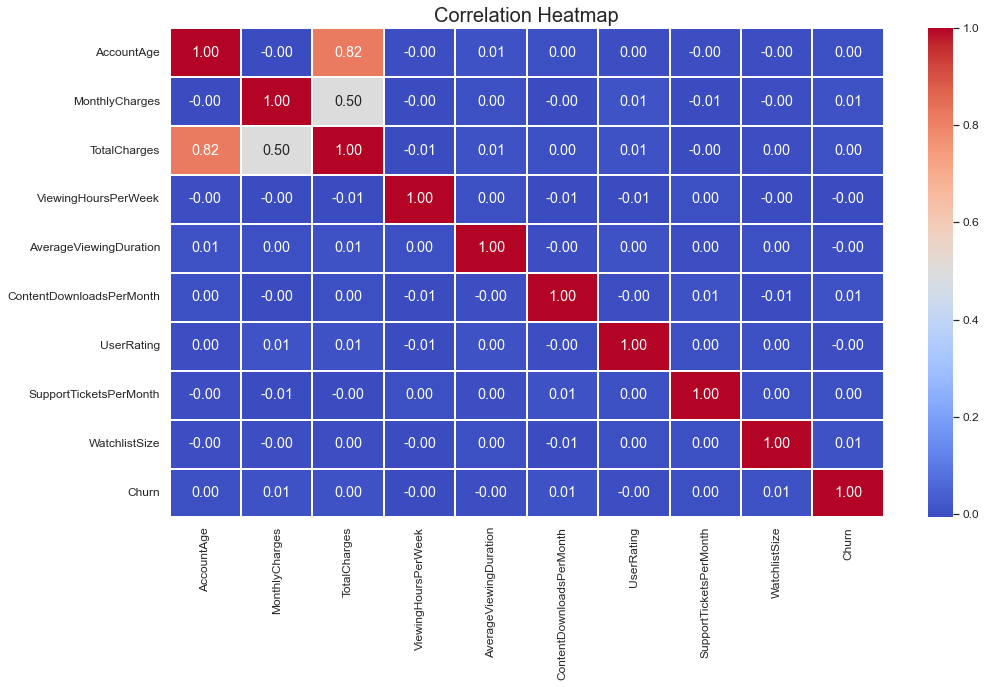

In [40]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

In [41]:
df_cat = df.select_dtypes(include=["object"])

In [42]:
df_cat.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,CustomerID
0,Premium,Credit card,Yes,TV Shows,Yes,Tablet,Fantasy,Female,Yes,No,Z9SF44FGVL
1,Basic,Bank transfer,Yes,Both,Yes,Mobile,Sci-Fi,Male,No,No,1K5TQJ2533
2,Standard,Mailed check,Yes,Both,Yes,Tablet,Action,Female,Yes,No,OLRW16I196
3,Premium,Mailed check,Yes,Movies,Yes,TV,Action,Male,Yes,No,DRK7LTXJ38
4,Standard,Electronic check,No,Movies,Yes,Tablet,Comedy,Female,Yes,No,4VFIAH3Z35


In [43]:
df_cat["Churn"] = df.Churn.values

In [44]:
df_cat.head()

,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,GenrePreference,Gender,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,Premium,Credit card,Yes,TV Shows,Yes,Tablet,Fantasy,Female,Yes,No,Z9SF44FGVL,1.00
1,Basic,Bank transfer,Yes,Both,Yes,Mobile,Sci-Fi,Male,No,No,1K5TQJ2533,999.00
2,Standard,Mailed check,Yes,Both,Yes,Tablet,Action,Female,Yes,No,OLRW16I196,0.00
3,Premium,Mailed check,Yes,Movies,Yes,TV,Action,Male,Yes,No,DRK7LTXJ38,0.00
4,Standard,Electronic check,No,Movies,Yes,Tablet,Comedy,Female,Yes,No,4VFIAH3Z35,999.00


In [45]:
df_cat.columns

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID', 'Churn'], dtype='object')

In [46]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['SubscriptionType'], values=['CustomerID'], aggfunc="count", margins=False)

CustomerID                 
SubscriptionType      Basic Premium Standard
Churn                                       
0.00                   6457    6787     6729
1.00                   1581    1344     1438
999.00                 3545    3483     3463

In [47]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['PaymentMethod'], values=['CustomerID'], aggfunc="count")

CustomerID                                          
PaymentMethod Bank transfer Credit card Electronic check Mailed check
Churn                                                                
0.00                   4913        5090             4963         5007
1.00                   1068        1003             1155         1137
999.00                 2730        2572             2572         2617

In [48]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['PaperlessBilling'], values=['CustomerID'], aggfunc="count")

CustomerID      
PaperlessBilling         No   Yes
Churn                            
0.00                   9976  9997
1.00                   2163  2200
999.00                 5242  5249

In [49]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['ContentType'], values=['CustomerID'], aggfunc="count")

CustomerID                
ContentType       Both Movies TV Shows
Churn                                 
0.00              6631   6595     6747
1.00              1547   1415     1401
999.00            3526   3468     3497

In [50]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['MultiDeviceAccess', 'DeviceRegistered'], values=['CustomerID'], aggfunc="count")

CustomerID                                                 
MultiDeviceAccess         No                          Yes                    
DeviceRegistered    Computer Mobile    TV Tablet Computer Mobile    TV Tablet
Churn                                                                        
0.00                    2439   2413  2433   2559     2542   2591  2448   2548
1.00                     522    544   558    540      539    568   545    547
999.00                  1225   1304  1356   1374     1300   1259  1322   1351

In [51]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['GenrePreference'], values=['CustomerID'], aggfunc="count")

CustomerID                            
GenrePreference     Action Comedy Drama Fantasy Sci-Fi
Churn                                                 
0.00                  3926   3969  4035    4032   4011
1.00                   819    978   828     849    889
999.00                2160   2152  2005    2096   2078

In [52]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['Gender'], values=['CustomerID'], aggfunc="count")

CustomerID      
Gender     Female  Male
Churn                  
0.00        10046  9927
1.00         2145  2218
999.00       5244  5247

In [53]:
pd.pivot_table(data=df_cat, index=['Churn'], columns=['ParentalControl', 'SubtitlesEnabled'], values=['CustomerID'], aggfunc="count")

CustomerID                  
ParentalControl          No         Yes      
SubtitlesEnabled         No   Yes    No   Yes
Churn                                        
0.00                   4869  5052  4965  5087
1.00                   1158  1068  1109  1028
999.00                 2612  2636  2673  2570

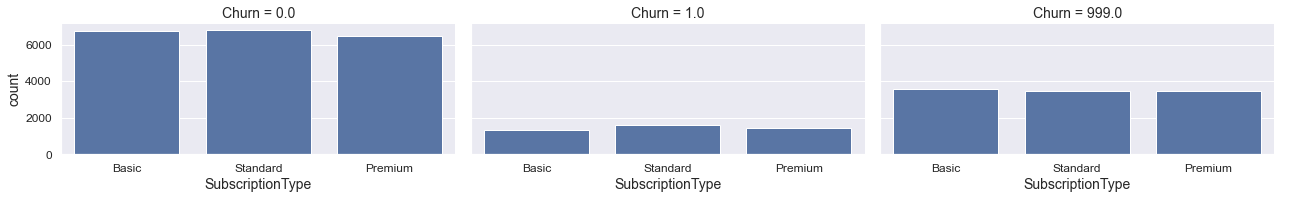

In [54]:
g = sns.FacetGrid(df_cat, col="Churn", height=3, aspect=2)
g.map(sns.countplot, "SubscriptionType")
g.add_legend()
plt.show()

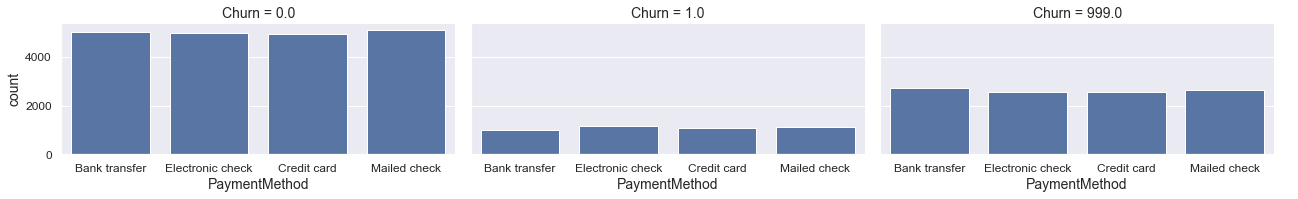

In [55]:
g = sns.FacetGrid(df_cat, col="Churn", height=3, aspect=2)
g.map(sns.countplot, "PaymentMethod")
g.add_legend()
plt.show()

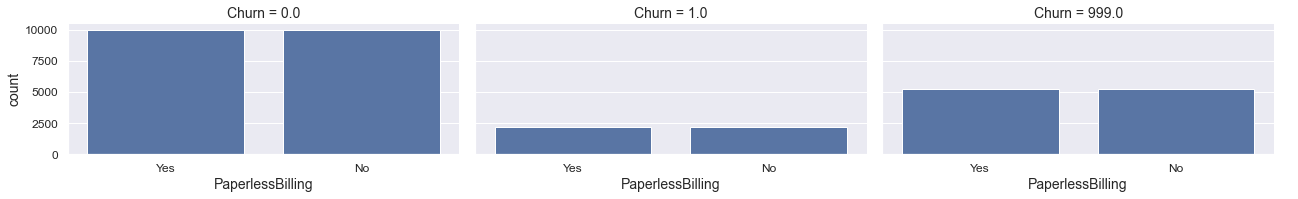

In [56]:
g = sns.FacetGrid(df_cat, col="Churn", height=3, aspect=2)
g.map(sns.countplot, "PaperlessBilling")
g.add_legend()
plt.show()

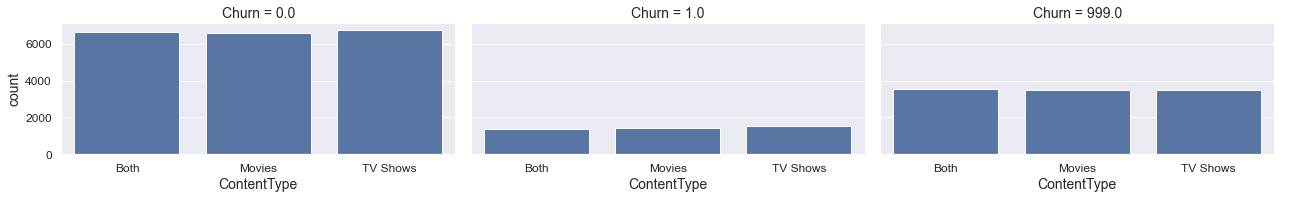

In [57]:
g = sns.FacetGrid(df_cat, col="Churn", height=3, aspect=2)
g.map(sns.countplot, "ContentType")
g.add_legend()
plt.show()

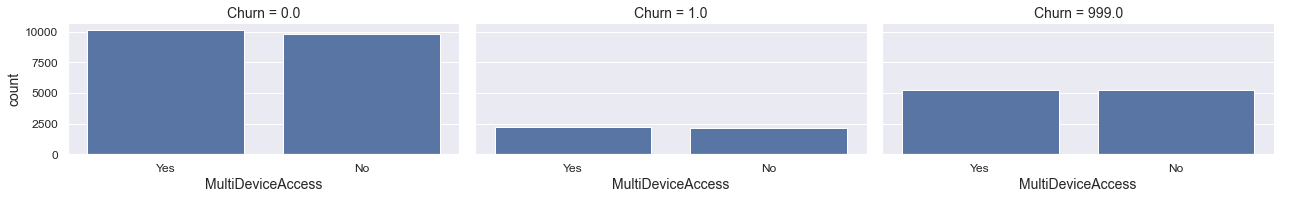

In [58]:
g = sns.FacetGrid(df_cat, col="Churn", height=3, aspect=2)
g.map(sns.countplot, "MultiDeviceAccess")
g.add_legend()
plt.show()

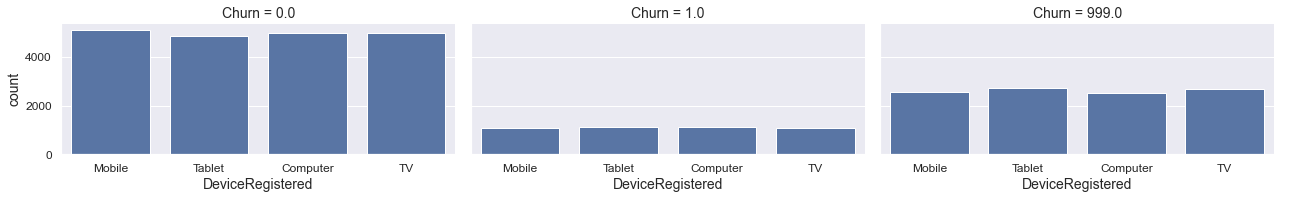

In [59]:
g = sns.FacetGrid(df_cat, col="Churn", height=3, aspect=2)
g.map(sns.countplot, "DeviceRegistered")
g.add_legend()
plt.show()

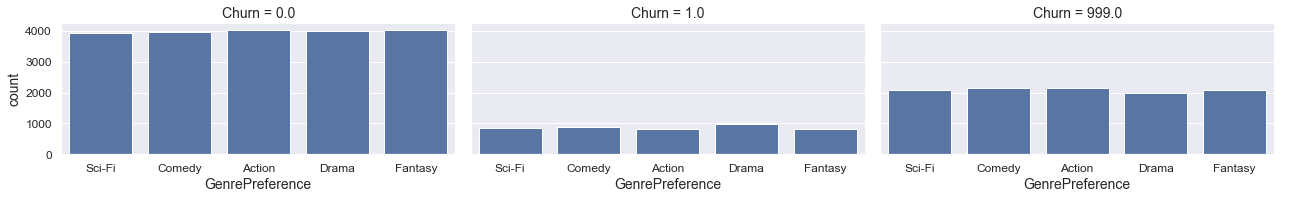

In [60]:
g = sns.FacetGrid(df_cat, col="Churn", height=3, aspect=2)
g.map(sns.countplot, "GenrePreference")
g.add_legend()
plt.show()

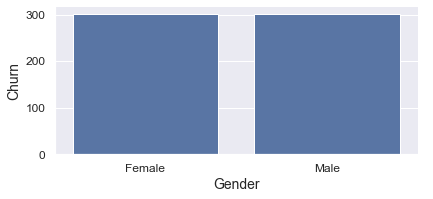

In [61]:
g = sns.FacetGrid(df_cat, col=None, height=3, aspect=2)
g.map(sns.barplot, "Gender", "Churn", ci=None)
g.add_legend()
plt.show()

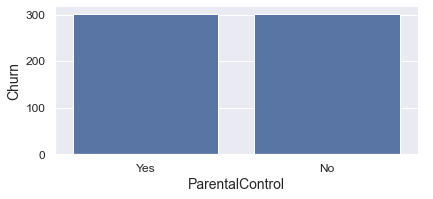

In [62]:
g = sns.FacetGrid(df_cat, col=None, height=3, aspect=2)
g.map(sns.barplot, "ParentalControl", "Churn", ci=None)
g.add_legend()
plt.show()

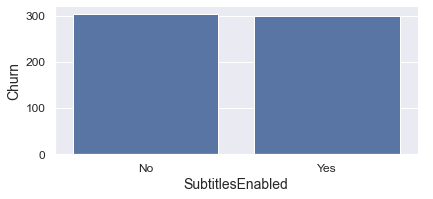

In [64]:
g = sns.FacetGrid(df_cat, col=None, height=3, aspect=2)
g.map(sns.barplot, "SubtitlesEnabled", "Churn", ci=None)
g.add_legend()
plt.show()

**==========================================================================================================**

**==========================================================================================================**

#### Python code done by Dennis Lam